# Project Luther
## What Makes a Comparable Company?
### Hasan Haq

In [315]:
import data
import matplotlib.pyplot as plt
import good_morning as gm
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from tqdm import tqdm
%matplotlib inline

## **Russell 1000 Stock Tickers**

In [313]:
ticks = []

with open('csv/russ1000.csv', 'r', encoding='utf-8') as f:
    csvfile = csv.reader(f)
    next(csvfile, None)
    for i in csvfile:
        ticks.append(i[0])

NameError: name 'csv' is not defined

# **View an example Morningstar data frame**

In [310]:
kr = gm.KeyRatiosDownloader()
ms = kr.download('APA')
ms[0]

Period,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Key Financials USD,,,,,,,,,,,
Revenue USD Mil,8074.0,9962.00,12390.00,8615.00,12092.00,16888.00,16564.00,14438.00,12801.00,6366.00,4862.0
Gross Margin %,82.1,82.00,83.30,79.00,81.70,82.80,81.40,79.70,80.40,67.60,63.4
Operating Income USD Mil,3917.0,4855.00,932.00,326.00,5435.00,8093.00,5012.00,3908.00,-2809.00,-28226.00,-22969.0
Operating Margin %,48.5,48.70,7.50,3.80,44.90,47.90,30.30,27.10,-21.90,-443.40,-472.4
Net Income USD Mil,2552.0,2812.00,712.00,-285.00,3032.00,4584.00,2001.00,2232.00,-5403.00,-23119.00,-18005.0
...,...,...,...,...,...,...,...,...,...,...,...
Operating Cash Flow USD Mil,4313.0,5677.00,7065.00,4224.00,6726.00,9953.00,8504.00,9835.00,8461.00,2984.00,2125.0
Cap Spending USD Mil,-4140.0,-4802.00,-5973.00,-3631.00,-4922.00,-7078.00,-9531.00,-11220.00,-12372.00,-5178.00,-2732.0
Free Cash Flow USD Mil,173.0,875.00,1092.00,593.00,1804.00,2875.00,-1027.00,-1385.00,-3911.00,-2194.00,-607.0


# **Iterate through and populate data for each ticker**

In [40]:
sic_num = []
ceo_good = []
ceo_age = []
score = []
cap = []
ocf = []
inv = []
capex = []
fcf = []
div = []
hist_eps = []
marg = []
cash = []
debt = []
ebitda = []
beta = []
inst = []
yr_hi = []
yr_200_hi = []
yr_50_hi = []
vol = []
px_gr = []
eps_gr = []
sg = []
rd = []
tax = []
roe = []
dso = []
ticky = []
    
kr = gm.KeyRatiosDownloader()

for t in tqdm(ticks):
    try:
        share = data.Share(t)
        ms = kr.download(t)
    except:
        continue
    try:
        temp = data.wsj(t)
        cash.append(temp[0])
        debt.append(temp[1])
        ebitda.append(temp[2])
    except:
        continue
    try:
        temp = data.reut_fin(t)
        beta.append(temp[0])
        inst.append(temp[1])
    except:
        beta.append(1)
        inst.append(0)
    try:
        sic_num.append(data.query_sic(t))
    except:
        sic_num.append(0)
    try:
        ceo_good.append(data.ceo(t)[2])
    except:
        ceo_good.append(False)
    try:    
        ceo_age.append(int(data.ceo(t)[1]))
    except:
        ceo_age.append(0)
    try:
        score.append(data.anal_score(t))
    except:
        score.append(0)
    try:
        cap.append(data.mb(share.get_market_cap()))
    except:
        cap.append(0)
    try:
        ocf.append(int(ms[0].iloc[10][-1]))
    except:
        ocf.append(-1)
    try:
        capex.append(ms[7].iloc[2][-1])
    except:
        capex.append(-1)
    try:
        fcf.append(float(int(float(np.nan_to_num(ms[7].iloc[3][-1]))*100)/100.00))
    except:
        fcf.append(-1)
    try:
        hist_eps.append(float(int(float(np.nan_to_num(ms[6].iloc[0][-1]))*100))/100.00)
    except:
        hist_eps.append(0.00)
    try:
        marg.append(float(np.nan_to_num(ms[0].iloc[3][-1])))
    except:
        marg.append(-1.00)
    try:
        sg.append(float(np.nan_to_num(ms[1].iloc[3][-1])))
    except:
        sg.append(0.00)
    try:
        rd.append(float(np.nan_to_num(ms[1].iloc[4][-1])))
    except:
        rd.append(0.00)
    try:
        tax.append(data.pct(np.nan_to_num(ms[2].iloc[0][-1])))
    except:
        tax.append(0.00)
    try:
        roe.append(float(np.nan_to_num(ms[2].iloc[5][-1])))
    except:
        roe.append(0.0)
    try:
        inv.append(int(np.nan_to_num(ms[10].iloc[5][-1])))
    except:
        inv.append(-1)
    try:
        dso.append(int(np.nan_to_num(ms[10].iloc[0][-1])))
    except:
        dso.append(-1)
    try:
        div.append(data.pct(share.get_dividend_yield()))
    except:
        div.append(0.00)
    try:
        yr_hi.append(data.pct(share.get_percent_change_from_year_high()))
    except:
        yr_hi.append(0.0)
    try:
        yr_200_hi.append(data.pct(share.get_percent_change_from_200_day_moving_average()))
    except:
        yr_200_hi.append(0.0)
    try:
        yr_50_hi.append(data.pct(share.get_percent_change_from_50_day_moving_average()))
    except:
        yr_50_hi.append(0.0)  
    try:
        vol.append(float(int(100*float(share.get_avg_daily_volume())/1000000.00)/100))
    except:
        vol.append(0.00)
    try:
        px_gr.append(float(int(100*float(share.get_one_yr_target_price())/float(share.get_price())))/100)
    except:
        px_gr.append(0.00)
    try:
        eps_gr.append(float(int(100*float(share.get_EPS_estimate_next_year())/float(share.get_EPS_estimate_current_year())))/100)
    except:
        eps_gr.append(0.00)
    ticky.append(t)

100%|██████████| 505/505 [37:23<00:00,  3.90s/it]


## **Create the DataFrame**

In [316]:
# df = pd.DataFrame({'ticker': ticky, 'cash': cash, 'debt': debt, 'ebitda': ebitda, 'cap': cap, 'sic_num': sic_num, 
#                    'ceo_good': ceo_good, 'ceo_age': ceo_age, 'score': score, 'ocf': ocf, 'inv': inv, 'capex': capex, 
#                    'fcf': fcf, 'div': div, 'hist_eps': hist_eps, 'marg': marg, 'beta': beta, 'inst': inst,
#                    'yr_hi': yr_hi, 'yr_200_hi': yr_200_hi, 'yr_50_hi': yr_50_hi, 'vol': vol, 'px_gr': px_gr,
#                    'eps_gr': eps_gr, 'sg': sg, 'rd': rd, 'tax': tax, 'roe': roe, 'dso': dso})
# df.to_csv('csv/df.csv')
# df.to_pickle('df.pkl')
df = pd.read_pickle('df.pkl')
# df = pd.read_pickle('df_1000.pkl')

## Add New Columns

In [317]:
# Create EBITDA multiple and leverage multiple columns
df['ebitda_mult'] = (df['cap'] + df['debt'] - df['cash'])/df['ebitda']
df['debt_mult'] = (df['debt']/df['ebitda'])

# Create R&D dummy variable column
df['rd_dum'] = [1 if x != 0 else 0 for x in df['rd']]

## **Clean Up Data (Handle Outliers)**

In [318]:
# Delete all items where market cap = 0
df_temp = df.loc[df['cap']!=0]

# Delete all items where EBITDA multiple > 80
df_temp = df.loc[df['ebitda_mult']<80]

# Replace hist_eps outliers with mean/max/min
eps_calc = df_temp['hist_eps'].loc[((df_temp['hist_eps']<200) | (df_temp['hist_eps']>-200)) & (df_temp['hist_eps'] != 0)]
df_temp.loc[df_temp['hist_eps']>=200, 'hist_eps'] = float(int(float(max(eps_calc)*100)/100))
df_temp.loc[df_temp['hist_eps']<=-200, 'hist_eps'] = float(int(float(min(eps_calc))*100)/100)
df_temp.loc[df_temp['hist_eps'] == 0, 'hist_eps'] = float(int(float(eps_calc.mean())*100)/100)

# Replace margin outliers with mean/max/min
marg_calc = df_temp['marg'].loc[((df_temp['marg']<90) & (df_temp['marg']>0))]
df_temp.loc[df_temp['marg']>=90, 'marg'] = float(int(float(max(marg_calc)*100)/100))
df_temp.loc[df_temp['marg']<=0, 'marg'] = float(int(float(min(marg_calc)*100)/100))

# Replace institutional % outliers with mean
inst_calc = df_temp['inst'].loc[(df_temp['inst'] != 0)]
df_temp.loc[(df_temp['inst'] == 0), 'inst'] = float(int(float(inst_calc.mean())*100)/100)

# Replace sg % outliers with mean
sg_calc = df_temp['sg'].loc[(df_temp['sg'] != 0)]
df_temp.loc[(df_temp['sg'] == 0), 'sg'] = float(int(float(sg_calc.mean())*100)/100)

# Replace tax % outliers with mean
tax_calc = df_temp['tax'].loc[(df_temp['tax'] != 0)]
df_temp.loc[(df_temp['tax'] == 0), 'tax'] = float(int(float(tax_calc.mean())*100)/100)

# Replace ceo_age with mean
ceo_calc = df_temp['ceo_age'].loc[(df_temp['ceo_age'] != 0)]
df_temp.loc[(df_temp['ceo_age'] == 0), 'ceo_age'] = float(int(float(ceo_calc.mean())*100)/100)

# Replace leverage multiple outliers with mean
debt_calc = df_temp['debt_mult'].loc[(df_temp['debt_mult'] < 20)]
df_temp.loc[(df_temp['debt_mult'] >= 20), 'debt_mult'] = float(int(float(max(debt_calc)*100)/100))

# Convert boolean to integer
df_temp['ceo_good'] = [1 if x == True else 0 for x in df_temp['ceo_good']]

# Fix the capex NA
capex_calc = df_temp['capex'].loc[(df_temp['capex'] == df_temp['capex'])]
df_temp.loc[(df_temp['capex'] != df_temp['capex']), 'capex'] = float(int(float(capex_calc.mean())*100)/100)

# Add intercept
df_temp['int'] = [1 for x in list(range(len(df_temp)))]

# Save the new DataFrame
df_clean = df_temp.copy()
df_clean.reindex()

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi,ebitda_mult,debt_mult,rd_dum,int
0,1.00,6630.0,4.24,853,56.21,0,1445,1.25,20,1028,...,29.81,AA,4.75,22.60,12.35,-6.88,7.025292,1.405642,1,1
1,1.00,22670.0,14.49,6949,54.00,0,20754,0.89,16,8900,...,29.81,AAL,6.73,7.15,-7.14,-13.01,4.098315,2.331910,0,1
2,1.06,11830.0,2.92,91,58.00,0,1232,0.15,16,1147,...,37.71,AAP,1.05,0.47,-5.73,-9.69,11.308631,1.074106,0,1
3,1.14,686540.0,5.94,67155,55.00,1,87032,1.87,22,68986,...,25.85,AAPL,31.63,14.84,8.46,-1.33,10.240005,1.261589,1,1
4,0.87,19500.0,0.35,2768,54.00,0,4481,1.75,22,2020,...,31.55,ABC,2.78,7.72,7.66,-4.18,10.501485,2.218317,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.91,343930.0,8.19,3705,51.00,0,38687,3.54,34,30931,...,8.01,XOM,11.41,-5.05,-5.61,-13.20,12.250234,1.250752,0,1
304,1.22,7170.0,1.70,1523,56.00,0,7367,4.46,47,2063,...,8.66,XRX,13.48,-23.44,-8.30,-37.93,6.308289,3.571013,1,1
305,1.23,8820.0,3.51,680,51.00,0,1274,1.25,80,606,...,14.29,XYL,1.45,-1.77,-1.13,-10.62,15.534653,2.102310,1,1
306,0.75,23810.0,6.80,840,58.00,0,3977,2.63,11,2726,...,16.09,YUM,2.93,1.90,0.75,-2.02,9.885180,1.458914,0,1


## View New Data

In [319]:
# df_clean.to_csv('df_clean_1000.csv')
# df_clean.to_csv('df_clean.csv')
df

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,sic_num,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi,ebitda_mult,debt_mult,rd_dum
0,1.00,6630.0,4.24,853,0,False,1445,1.25,20,1028,...,5,0.00,AA,4.75,22.60,12.35,-6.88,7.025292,1.405642,1
1,1.00,22670.0,14.49,6949,54,False,20754,0.89,16,8900,...,6,0.00,AAL,6.73,7.15,-7.14,-13.01,4.098315,2.331910,0
2,1.06,11830.0,2.92,91,58,False,1232,0.15,16,1147,...,8,37.71,AAP,1.05,0.47,-5.73,-9.69,11.308631,1.074106,0
3,1.14,686540.0,5.94,67155,55,True,87032,1.87,22,68986,...,5,25.85,AAPL,31.63,14.84,8.46,-1.33,10.240005,1.261589,1
4,0.87,19500.0,0.35,2768,54,False,4481,1.75,22,2020,...,7,31.55,ABC,2.78,7.72,7.66,-4.18,10.501485,2.218317,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.91,343930.0,8.19,3705,51,False,38687,3.54,34,30931,...,5,8.01,XOM,11.41,-5.05,-5.61,-13.20,12.250234,1.250752,0
304,1.22,7170.0,1.70,1523,56,False,7367,4.46,47,2063,...,10,8.66,XRX,13.48,-23.44,-8.30,-37.93,6.308289,3.571013,1
305,1.23,8820.0,3.51,680,51,False,1274,1.25,80,606,...,5,14.29,XYL,1.45,-1.77,-1.13,-10.62,15.534653,2.102310,1
306,0.75,23810.0,6.80,840,58,False,3977,2.63,11,2726,...,8,16.09,YUM,2.93,1.90,0.75,-2.02,9.885180,1.458914,0


## **Check Out the Correlation**

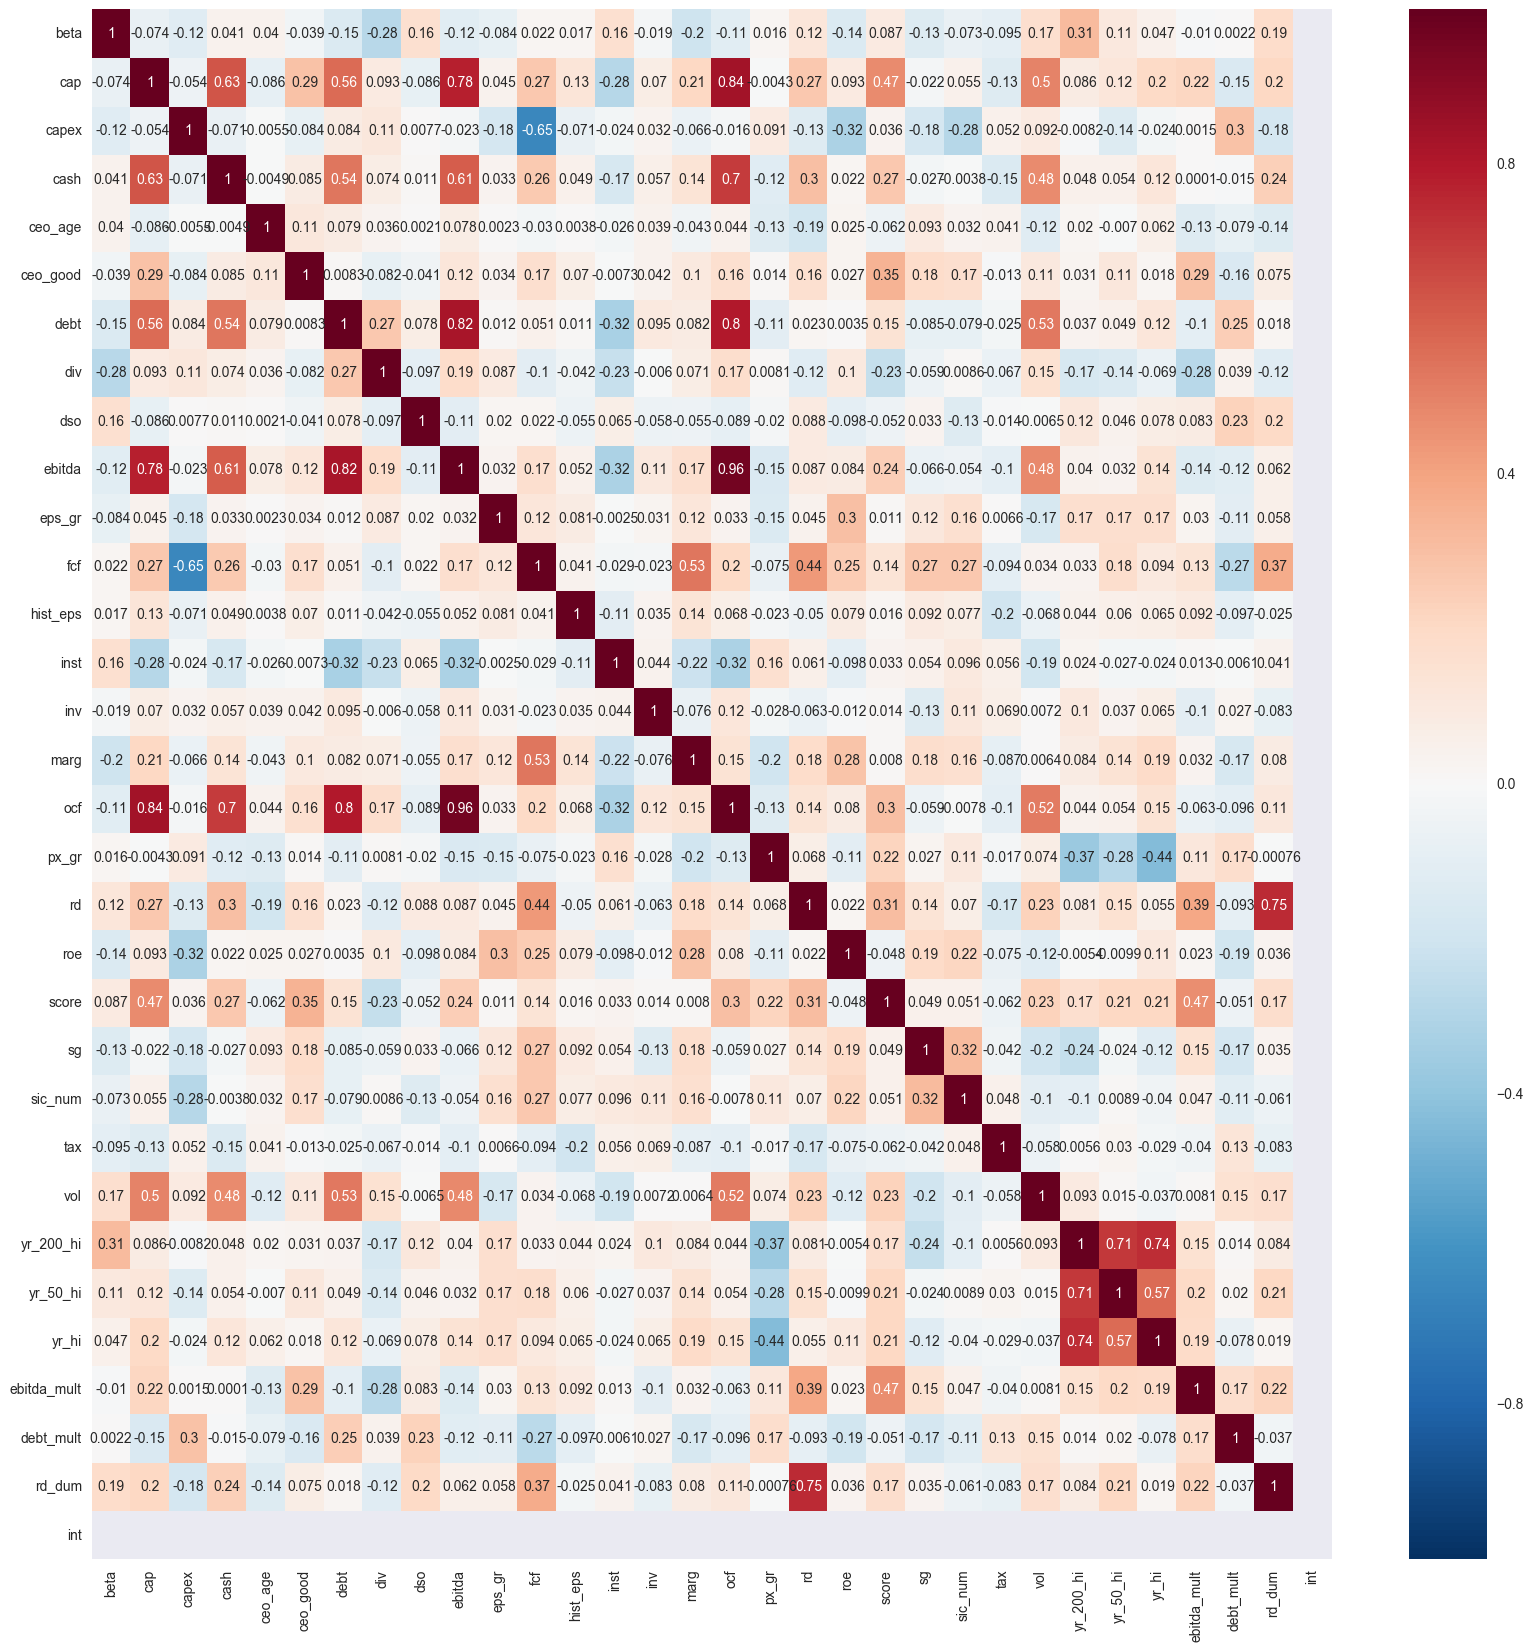

In [320]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_clean.corr(), annot=True, ax=ax);

## **Make our Dummy Variables**

In [321]:
df_cleandum = pd.get_dummies(df_clean, columns=['sic_num'], drop_first=True)

## **Create a Regression Summary Table (Manual - Statsmodels)**

In [322]:
df_cleandum.columns

Index(['beta', 'cap', 'capex', 'cash', 'ceo_age', 'ceo_good', 'debt', 'div',
       'dso', 'ebitda', 'eps_gr', 'fcf', 'hist_eps', 'inst', 'inv', 'marg',
       'ocf', 'px_gr', 'rd', 'roe', 'score', 'sg', 'tax', 'ticker', 'vol',
       'yr_200_hi', 'yr_50_hi', 'yr_hi', 'ebitda_mult', 'debt_mult', 'rd_dum',
       'int', 'sic_num_2', 'sic_num_3', 'sic_num_5', 'sic_num_6', 'sic_num_7',
       'sic_num_8', 'sic_num_9', 'sic_num_10'],
      dtype='object')

In [323]:
y=df_cleandum['ebitda_mult']
y=np.log(y)
x=df_cleandum.drop(['cap', 'cash', 'debt', 'ebitda', 'ocf', 'ticker', 'ebitda_mult',
                    'eps_gr', 'hist_eps', 'inv', 'tax', 'dso', 'yr_50_hi', 'roe',
                    'yr_200_hi', 'fcf', 'inst', 'ceo_age', 'px_gr', 'capex', 'rd_dum'],1)
x['score'] = x['score']**2
x['vol'] = x['vol']**(1/2)
x['rd'] = x['rd']**2
x['ceo_good'] = x['ceo_good']**(1/2)

In [324]:
lsm = sm.OLS(y,x)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ebitda_mult   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     27.45
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           4.33e-52
Time:                        02:55:14   Log-Likelihood:                -88.477
No. Observations:                 308   AIC:                             215.0
Df Residuals:                     289   BIC:                             285.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
beta          -0.2391      0.049     -4.921      0.000        -0.335    -0.143
ceo_good       0.1902      0.074      2.581      0.010         0.045     0.335
div           -0.0412      0.015     -2.767      0.006        -0.070    -0.012
marg           0.0045      0.002      2.187      0.030         0.000     0.009
rd             0.0009      0.000      4.423      0.000         0.000     0.001
score          0.0005   9.01e-05      5.640      0.000         0.000     0.001
sg             0.0072      0.002      4.096      0.000         0.004     0.011
vol           -0.0859      0.023     -3.776      0.000        -0.131    -0.041
yr_hi          0.0119      0.002      6.405      0.000         0.008     0.016
debt_mult      0.1077      0.011      9.370      0.000         0.085     0.130
int           -0.8808      0.257     -3.434      0.001        -1.386    -0.376
sic_num_2      3.5156      0.261     13.487      0.000         3.003     4.029
sic_num_3      3.4151      0.296     11.533      0.000         2.832     3.998
sic_num_5      3.3526      0.244     13.727      0.000         2.872     3.833
sic_num_6      3.0179      0.247     12.242      0.000         2.533     3.503
sic_num_7      3.4648      0.269     12.892      0.000         2.936     3.994
sic_num_8      3.2668      0.253     12.914      0.000         2.769     3.765
sic_num_9      3.5000      0.414      8.454      0.000         2.685     4.315
sic_num_10     3.2338      0.247     13.109      0.000         2.748     3.719
==============================================================================
Omnibus:                       56.224   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.001
Skew:                          -0.584   Prob(JB):                     2.93e-68
Kurtosis:                       7.782   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Statsmodels Residual Plot

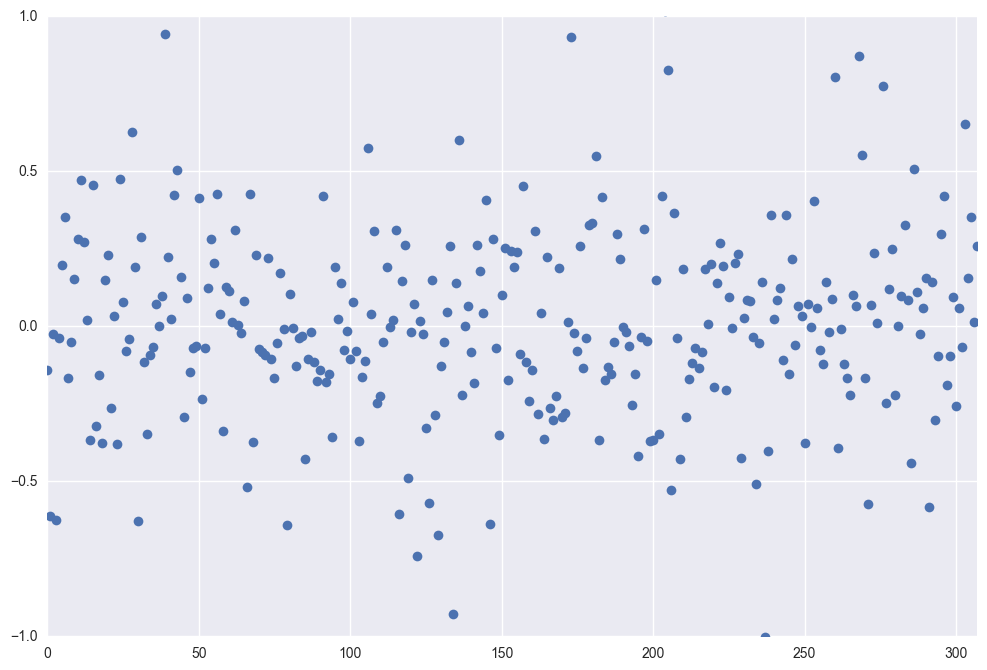

In [325]:
fit.resid.plot(style='o', figsize=(12,8), ylim=[-1,1]);

## Pair Plots

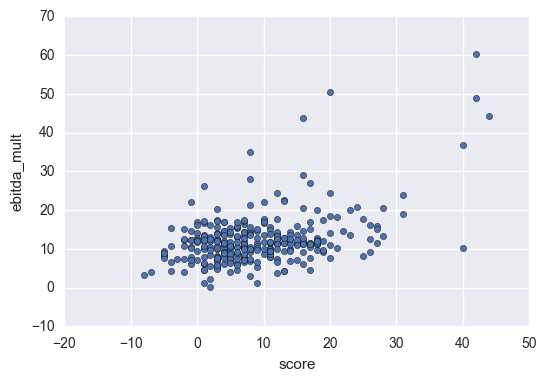

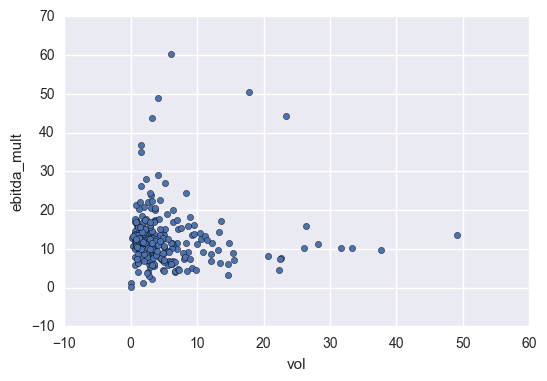

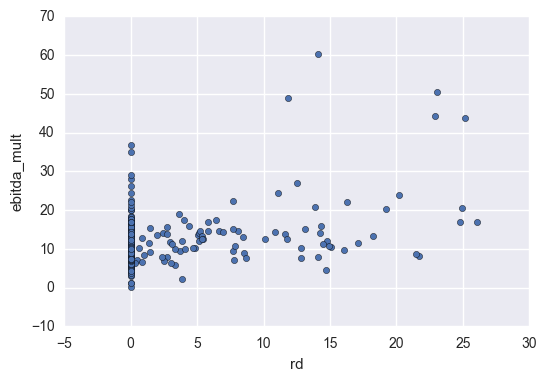

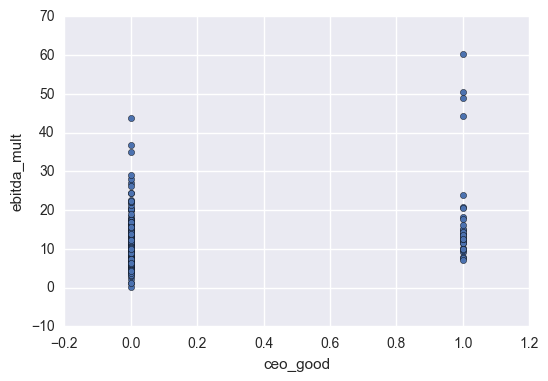

In [326]:
df_cleandum.plot('score', 'ebitda_mult', kind="scatter")
df_cleandum.plot('vol', 'ebitda_mult', kind="scatter")
df_cleandum.plot('rd', 'ebitda_mult', kind="scatter")
df_cleandum.plot('ceo_good', 'ebitda_mult', kind="scatter")

## Cross-Validate with Sklearn (Linear)

In [327]:
df_random = df_cleandum.sample(frac=1)

In [328]:
Y=df_random['ebitda_mult']
Y=np.log(Y)
X=df_random.drop(['cap', 'cash', 'debt', 'ebitda', 'ocf', 'ticker', 'ebitda_mult',
                  'eps_gr', 'hist_eps', 'inv', 'tax', 'dso', 'yr_50_hi', 'roe',
                  'yr_200_hi', 'fcf', 'inst', 'ceo_age', 'px_gr', 'capex', 'rd_dum'],1)

In [330]:
lr1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
lr1.fit(X, Y)
lr1.score(X, Y)

0.61370114992882219

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)
lr1.fit(X_train, y_train)
lr1.score(X_test, y_test)

0.40433794520273381

In [333]:
scores = cross_val_score(lr1, X, Y, cv=10, scoring='mean_squared_error')
print(-scores)
-sum(scores)/len(scores)

[ 0.16427875  0.08493597  0.10843968  0.13378608  0.32590995  0.14222447
  0.10344012  0.43435297  0.07653999  0.10678997]


0.16806979425740956

## LassoCV

In [334]:
Ya=df_cleandum['ebitda_mult']
# Ya=np.log(df_cleandum['ebitda_mult'])
Xa=df_cleandum.drop(['cap', 'cash', 'debt', 'ebitda', 'ocf', 'ticker', 'ebitda_mult'],1)

In [335]:
las = make_pipeline(PolynomialFeatures(1), LassoCV())
las.fit(Xa, Ya)
las.score(Xa, Ya)

0.48172130828144744

In [336]:
len(np.where(las.steps[1][1].coef_>0)[0])

11